In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None 
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('Car details v3.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
len(df['torque'].unique())

442

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
df.describe()


,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


# 

# DATA CLEANING

In [7]:
mileage_kmpl = df['mileage']

In [8]:
#my dataset has 66 km/kg but assumed as kmpl as it doesnot make that much difference as it constitues less than 1% of my data
for i in range(len(mileage_kmpl)):
    print(mileage_kmpl[i])

23.4 kmpl
21.14 kmpl
17.7 kmpl
23.0 kmpl
16.1 kmpl
20.14 kmpl
17.3 km/kg
16.1 kmpl
23.59 kmpl
20.0 kmpl
19.01 kmpl
17.3 kmpl
19.3 kmpl
nan
18.9 kmpl
18.15 kmpl
24.52 kmpl
23.0 kmpl
19.7 kmpl
22.54 kmpl
21.0 kmpl
25.5 kmpl
26.59 kmpl
21.5 kmpl
20.3 kmpl
21.4 kmpl
24.7 kmpl
18.2 kmpl
18.9 kmpl
16.8 kmpl
24.3 kmpl
nan
14.0 kmpl
18.6 kmpl
24.3 kmpl
33.44 km/kg
23.95 kmpl
17.0 kmpl
20.63 kmpl
13.93 kmpl
16.1 kmpl
16.0 kmpl
17.8 kmpl
16.8 kmpl
18.5 kmpl
24.3 kmpl
23.95 kmpl
12.55 kmpl
12.99 kmpl
14.8 kmpl
24.7 kmpl
13.5 kmpl
26.0 kmpl
20.65 kmpl
27.3 kmpl
11.36 kmpl
12.99 kmpl
17.68 kmpl
14.28 kmpl
18.53 kmpl
14.84 kmpl
21.12 kmpl
20.36 kmpl
21.27 kmpl
26.59 kmpl
18.16 kmpl
21.4 kmpl
22.0 kmpl
25.1 kmpl
20.51 kmpl
21.66 kmpl
24.3 kmpl
24.3 kmpl
20.36 kmpl
25.2 kmpl
12.55 kmpl
22.9 kmpl
16.02 kmpl
nan
20.54 kmpl
12.99 kmpl
22.77 kmpl
15.71 kmpl
23.1 kmpl
19.02 kmpl
24.7 kmpl
24.7 kmpl
nan
19.81 kmpl
14.0 kmpl
26.2 km/kg
16.47 kmpl
19.81 kmpl
15.04 kmpl
18.2 kmpl
18.5 kmpl
26.59 kmpl
19.1 kmpl

nan
25.5 kmpl
13.5 kmpl
20.92 kmpl
21.19 kmpl
16.8 kmpl
25.2 kmpl
27.3 kmpl
19.62 kmpl
25.1 kmpl
nan
nan
20.89 kmpl
28.4 kmpl
24.3 kmpl
21.0 kmpl
18.6 kmpl
20.77 kmpl
21.7 kmpl
27.4 kmpl
23.4 kmpl
15.0 kmpl
16.02 kmpl
24.3 kmpl
17.7 kmpl
17.21 kmpl
19.81 kmpl
26.59 kmpl
16.02 kmpl
15.1 kmpl
21.1 kmpl
15.96 kmpl
15.4 kmpl
20.0 kmpl
18.2 kmpl
11.57 kmpl
16.1 kmpl
10.5 kmpl
13.6 kmpl
22.1 kmpl
23.59 kmpl
20.0 kmpl
16.1 kmpl
24.3 kmpl
20.77 kmpl
25.2 kmpl
21.5 kmpl
14.9 kmpl
23.84 kmpl
26.59 kmpl
19.3 kmpl
18.8 kmpl
17.3 kmpl
18.6 kmpl
22.54 kmpl
19.7 kmpl
19.5 kmpl
12.05 kmpl
19.81 kmpl
25.8 kmpl
26.59 kmpl
15.0 kmpl
20.4 kmpl
15.96 kmpl
15.6 kmpl
15.96 kmpl
15.1 kmpl
nan
19.81 kmpl
18.9 kmpl
16.1 kmpl
28.4 kmpl
20.51 kmpl
23.95 kmpl
24.0 kmpl
20.51 kmpl
26.59 kmpl
19.7 kmpl
22.07 kmpl
26.2 km/kg
nan
12.8 kmpl
21.9 kmpl
15.96 kmpl
21.4 kmpl
24.7 kmpl
28.4 kmpl
24.0 kmpl
19.09 kmpl
24.4 kmpl
18.6 kmpl
21.9 kmpl
24.7 kmpl
19.3 kmpl
24.4 kmpl
22.74 kmpl
17.5 kmpl
19.3 kmpl
10.91 kmpl
19.5 km

22.95 kmpl
19.7 kmpl
25.8 kmpl
21.9 kmpl
20.5 kmpl
23.4 kmpl
17.5 kmpl
21.03 kmpl
19.61 kmpl
18.9 kmpl
18.2 kmpl
12.99 kmpl
25.5 kmpl
26.21 kmpl
20.36 kmpl
21.02 kmpl
24.3 kmpl
11.36 kmpl
12.99 kmpl
20.77 kmpl
25.83 kmpl
21.64 kmpl
20.0 kmpl
25.2 kmpl
nan
18.0 kmpl
16.07 kmpl
18.2 kmpl
18.2 kmpl
10.93 kmpl
nan
23.0 kmpl
22.54 kmpl
15.4 kmpl
10.9 km/kg
nan
nan
18.5 kmpl
17.8 kmpl
22.32 kmpl
20.54 kmpl
21.19 kmpl
25.47 kmpl
22.32 kmpl
26.21 kmpl
18.16 kmpl
20.36 kmpl
15.64 kmpl
19.01 kmpl
18.5 kmpl
23.0 kmpl
20.36 kmpl
19.7 kmpl
21.12 kmpl
18.6 kmpl
20.54 kmpl
20.3 kmpl
15.1 kmpl
18.06 kmpl
24.7 kmpl
26.2 km/kg
19.4 kmpl
13.2 kmpl
22.9 kmpl
20.36 kmpl
15.4 kmpl
20.0 kmpl
25.17 kmpl
15.96 kmpl
18.0 kmpl
18.6 kmpl
18.9 kmpl
25.17 kmpl
28.4 kmpl
17.92 kmpl
16.5 kmpl
18.9 kmpl
19.7 kmpl
15.5 kmpl
15.5 kmpl
19.4 kmpl
15.96 kmpl
21.1 kmpl
19.7 kmpl
13.6 kmpl
22.37 kmpl
19.33 kmpl
14.1 kmpl
18.0 kmpl
19.16 kmpl
21.79 kmpl
27.39 kmpl
18.2 kmpl
12.99 kmpl
22.0 kmpl
16.78 kmpl
22.0 kmpl
24.0 kmpl


20.0 kmpl
22.54 kmpl
27.28 kmpl
20.14 kmpl
28.4 kmpl
16.6 km/kg
16.0 km/kg
20.86 kmpl
20.54 kmpl
20.3 kmpl
12.9 kmpl
18.6 kmpl
20.5 kmpl
22.77 kmpl
18.4 kmpl
27.39 kmpl
nan
23.2 kmpl
16.1 kmpl
13.6 kmpl
nan
21.1 kmpl
19.67 kmpl
19.64 kmpl
26.59 kmpl
nan
26.2 km/kg
11.57 kmpl
13.1 kmpl
nan
20.51 kmpl
16.1 kmpl
20.54 kmpl
17.8 kmpl
27.28 kmpl
16.1 kmpl
12.8 kmpl
28.4 kmpl
24.4 kmpl
20.36 kmpl
19.0 kmpl
20.4 kmpl
17.7 kmpl
13.9 kmpl
23.4 kmpl
12.05 kmpl
15.6 kmpl
24.8 kmpl
28.4 kmpl
20.14 kmpl
22.54 kmpl
12.05 kmpl
16.8 kmpl
25.1 kmpl
14.0 kmpl
20.36 kmpl
18.9 kmpl
24.3 kmpl
25.44 kmpl
19.09 kmpl
16.0 kmpl
18.5 kmpl
12.05 kmpl
21.1 kmpl
25.44 kmpl
17.19 kmpl
18.9 kmpl
18.9 kmpl
18.6 kmpl
20.0 kmpl
19.3 kmpl
13.93 kmpl
22.32 kmpl
19.7 kmpl
21.14 kmpl
10.0 kmpl
25.0 kmpl
28.4 kmpl
24.3 kmpl
23.0 kmpl
16.25 kmpl
22.54 kmpl
22.0 kmpl
21.66 kmpl
21.9 kmpl
17.3 kmpl
23.65 kmpl
22.0 kmpl
12.8 kmpl
20.14 kmpl
21.66 kmpl
24.52 kmpl
23.1 kmpl
27.39 kmpl
22.9 kmpl
18.49 kmpl
16.8 kmpl
14.74 kmpl
24.

25.1 kmpl
23.84 kmpl
nan
25.83 kmpl
12.99 kmpl
15.1 kmpl
nan
23.2 kmpl
10.5 kmpl
18.5 kmpl
21.9 kmpl
15.4 kmpl
23.9 kmpl
22.27 kmpl
21.1 kmpl
24.52 kmpl
19.7 kmpl
18.6 kmpl
17.0 kmpl
22.0 kmpl
20.0 kmpl
17.0 kmpl
20.3 kmpl
nan
25.83 kmpl
20.3 kmpl
23.03 kmpl
22.5 kmpl
16.78 kmpl
19.09 kmpl
25.0 kmpl
12.05 kmpl
18.88 kmpl
19.01 kmpl
25.83 kmpl
13.6 kmpl
19.81 kmpl
19.7 kmpl
17.0 kmpl
25.5 kmpl
14.8 kmpl
15.64 kmpl
nan
28.09 kmpl
17.0 kmpl
25.17 kmpl
17.1 kmpl
22.32 kmpl
17.4 kmpl
20.77 kmpl
17.01 kmpl
22.54 kmpl
16.4 kmpl
24.04 kmpl
13.1 kmpl
21.04 kmpl
14.0 kmpl
21.19 kmpl
16.8 kmpl
18.16 kmpl
24.5 kmpl
20.3 kmpl
16.1 kmpl
21.04 kmpl
17.1 kmpl
15.3 kmpl
20.4 kmpl
12.8 kmpl
19.33 kmpl
28.4 kmpl
23.4 kmpl
25.17 kmpl
19.01 kmpl
20.0 kmpl
25.32 kmpl
11.3 kmpl
21.66 kmpl
17.68 kmpl
18.1 kmpl
16.8 kmpl
18.1 kmpl
16.47 kmpl
16.96 kmpl
10.1 kmpl
22.9 kmpl
11.2 kmpl
19.67 kmpl
24.4 kmpl
20.45 kmpl
17.8 kmpl
16.52 kmpl
11.36 kmpl
25.6 kmpl
14.8 kmpl
20.54 kmpl
17.8 kmpl
17.7 kmpl
nan
26.0 kmpl
2

In [9]:
#split the mileage column at it's first space to get just the numeric value in object datatype
#mileage was stored in the format 'numeric_value kmpl'
#after storing the entire numeric value as object data types, mapped the list to floating point
m1 = []
for i in range (len(mileage_kmpl)):
    m1.append(str(mileage_kmpl[i]).split(" ")[0])
mileage_kmpl = list(map(float, m1))
df['mileage_kmpl'] = mileage_kmpl
df['mileage_kmpl'].isnull().sum()
df.drop('mileage' , axis = 1 , inplace= True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,mileage_kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.70
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.10


In [10]:
#similar method applied to engine column
engine_cc = df['engine']
e1 = []
for j in range(len(engine_cc)):
    e1.append(str(df['engine'][j]).split(" ")[0])
engine_cc = list(map(float, e1))


In [11]:
#max_power column was stored in the column as 'numeric value bhp'
#the maxpower column had a few features that were empty and not nan, using regex cleaned maxpower 
#all the values in maxpower were in bhp so no further datacleaning was required
max_power_bhp = []
for i in range(len(df['max_power'])):
    max_power_bhp.append(str(df['max_power'][i]).split(" ")[0])
    

In [12]:
for i in range(len(df['max_power'])):
    if (max_power_bhp[i] == ''):
        max_power_bhp[i] = np.nan

max_power_bhp = list(map(float, max_power_bhp))   

#this method was not used as it removed all the decimal point in numeric value as well
#df['max_power'] = df['max_power'].str.replace(r'\D' , '', regex=True)
#df['max_power'].isnull().sum()
#df['max_power']=df['max_power'].replace('', np.nan, regex=True)
#df['max_power'].isnull().sum()
#df['max_power']=df['max_power'].astype(float)

In [13]:
#replacing the max_power college with max_power_bhp
n = df.columns[9]
df.drop(n, axis = 1, inplace = True)
df[n] = max_power_bhp



In [14]:
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())
print(df['fuel'].unique())
print(df['year'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
['Diesel' 'Petrol' 'LPG' 'CNG']
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2003 2019 2008 2020 1999 2000 1983 2004 1996 1994 1995 1998 1997
 1991]


In [15]:
df['seats'] = df['seats'].fillna(df['seats'].median())

In [16]:
df['seats'].isnull().sum()

0

In [17]:
#2/3rds of the dataset has seats value as 5, so filling in the null values as 5 is not a bad approximation
(df['seats']== 5.0).sum()

6475

In [18]:
df['mileage_kmpl'].isnull().sum()

221

In [19]:
df['mileage_kmpl'].median()

19.3

In [20]:
(df['mileage_kmpl']== 19.3).sum()


65

In [21]:
df['torque'] = df['torque'].str.replace(',', '', regex=True)

In [22]:
df.torque[4614]

'13.5@ 2500(kgm@ rpm)'

In [23]:
#standardised the torque column by replacing all the @ with at in the dataset
#this will help in better understanding the dataset and cleaning the dataset column easily
df['torque'] = df['torque'].str.replace('@', ' at', regex=True)

        
        

In [24]:
#storing the dataframe torque in 'tt' so that all the imputation can be made in a copy
tt = df['torque']
tt

0                  190Nm at 2000rpm
1             250Nm at 1500-2500rpm
2          12.7 at 2700(kgm at rpm)
3          22.4 kgm at 1750-2750rpm
4          11.5 at 4500(kgm at rpm)
                   ...             
8123             113.7Nm at 4000rpm
8124    24 at 1900-2750(kgm at rpm)
8125               190Nm at 2000rpm
8126          140Nm at 1800-3000rpm
8127          140Nm at 1800-3000rpm
Name: torque, Length: 8128, dtype: object

In [25]:
#further segregating the dataset by divding the dataset into torque_rpm and torque_nm
for i in range(len(tt)):
    if (str(df['torque'][i]).endswith('(kgm at rpm)')):
        #replacing all the data-entries that end with 'kgm at rpm' with __ temporarily
        tt[i] = str(tt[i]).replace('(kgm at rpm)', '__')
        #replaced the first blank space with kgm because that's what the numeric value denotes
        tt[i] = tt[i].replace(' ', ' kgm ', 1)
        #replaced the __ with rpm because that is what the last numeric value represents 
        tt[i] = tt[i].replace('__', 'rpm')
    
    
    #similar procedure was used for dataset that had NM instead of kgm
    elif (str(df['torque'][i]).endswith('(NM at rpm)')):
        tt[i] = tt[i].replace('(NM at rpm)', '__')
        tt[i] = tt[i].replace(' ', 'Nm ', 1)
        tt[i] = tt[i].replace('__', 'rpm')
        
print(tt[5])
#the dataset has been standardised in the form 'numeric_value_NM/KGM at numeric_value_RPM'

113.75nm at 4000rpm


In [26]:
#spliting the dataset into tt_Nm and tt_rpm 
tt_Nm = []
tt_rpm = []
for d in range(len(tt)):
    #after spliting at 'at' the array stores Nm/kgm numeric value in it's 0th index
    tt_Nm.append(str(tt[d]).split('at')[0])
    #after spliting at 'at' the array stores rpm numeric value in it's last index
    tt_rpm.append(str(tt[d]).split('at')[-1])
    
    

tt_rpm

[' 2000rpm',
 ' 1500-2500rpm',
 ' 2700rpm',
 ' 1750-2750rpm',
 ' 4500rpm',
 ' 4000rpm',
 ' 4500rpm',
 ' 2500rpm',
 ' 1800-2400rpm',
 ' 2000rpm',
 ' 2250rpm',
 ' 4500rpm',
 ' 2000rpm',
 'nan',
 ' 3500rpm',
 ' 3500-3600rpm',
 ' 1750rpm',
 ' 1750-2750rpm',
 ' 3000rpm',
 ' 1500-2750rpm',
 ' 2000rpm',
 ' 1750rpm',
 ' 2000rpm',
 ' 1750rpm',
 ' 3500rpm',
 ' 4000rpm',
 ' 3500rpm',
 ' 1750rpm',
 ' 3500rpm',
 ' 2500rpm',
 ' 1750rpm',
 'nan',
 ' 3000rpm',
 ' 4000rpm',
 ' 1750rpm',
 ' 3500rpm',
 ' 3500rpm',
 ' 4850rpm',
 ' 4000rpm',
 ' 1700-2700rpm',
 ' 2500rpm',
 ' 1750-2500rpm',
 ' 4600rpm',
 ' 4800rpm',
 ' 4000rpm',
 ' 1750rpm',
 ' 3500rpm',
 ' 1400-3400rpm',
 ' 1400-3400rpm',
 ' 1250-4000rpm',
 ' 1750rpm',
 ' 2000-2500rpm',
 ' 1750rpm',
 ' 4400rpm',
 ' 1750rpm',
 ' 1200-3400rpm',
 ' 1200-3600rpm',
 ' 1750-2500rpm',
 ' 4000rpm',
 ' 1750-3000rpm',
 ' 1400-2800rpm',
 ' 1750-3000rpm',
 ' 4000rpm',
 ' 1500-2750rpm',
 ' 2000rpm',
 ' 4000rpm',
 ' 4000rpm',
 ' 1500-3000rpm',
 ' 1750rpm',
 ' 3500rpm',


In [27]:
tt_Nm[1].split('N')[0]

'250'

In [28]:
tt_Nm[4979]

'24 KGM '

In [29]:
#storing the indices of all the the entries that end with kgm (which is in minority) in another list
#this wasn't used anywhere , kept giving array out of bound error when nested list was used to convert kgm to Nm
counter_list = []
for ind in range(len(tt_Nm)):
    if(str(tt_Nm[ind]).endswith('kgm ') or str(tt_Nm[ind]).endswith('KGM ')or str(tt_Nm[ind]).endswith('kgm')):
        counter_list.append(ind)
        

In [30]:
counter_list


[2,
 3,
 4,
 6,
 17,
 32,
 89,
 184,
 193,
 226,
 242,
 250,
 251,
 270,
 280,
 301,
 324,
 327,
 330,
 359,
 394,
 396,
 397,
 401,
 435,
 474,
 478,
 514,
 568,
 587,
 604,
 638,
 644,
 671,
 721,
 745,
 752,
 769,
 805,
 818,
 824,
 831,
 840,
 845,
 852,
 856,
 876,
 888,
 889,
 897,
 898,
 903,
 905,
 919,
 940,
 950,
 960,
 964,
 993,
 996,
 1003,
 1004,
 1023,
 1024,
 1032,
 1038,
 1044,
 1156,
 1177,
 1187,
 1211,
 1234,
 1256,
 1257,
 1264,
 1265,
 1282,
 1371,
 1404,
 1412,
 1421,
 1426,
 1429,
 1456,
 1479,
 1513,
 1523,
 1536,
 1614,
 1629,
 1658,
 1659,
 1663,
 1667,
 1686,
 1694,
 1732,
 1735,
 1754,
 1760,
 1762,
 1770,
 1780,
 1790,
 1807,
 1816,
 1824,
 1829,
 1855,
 1883,
 1942,
 1971,
 1990,
 1998,
 2006,
 2024,
 2045,
 2077,
 2081,
 2086,
 2108,
 2117,
 2166,
 2223,
 2228,
 2237,
 2239,
 2243,
 2257,
 2276,
 2289,
 2314,
 2320,
 2321,
 2327,
 2333,
 2345,
 2384,
 2402,
 2421,
 2423,
 2425,
 2435,
 2441,
 2465,
 2478,
 2479,
 2536,
 2586,
 2592,
 2612,
 2653,
 2707,


In [31]:
#storing the Numeric value of tt_Nm in the same list
#splititng at 'Nm' gives the the numeric value in 1st index
for i in range(len(tt_Nm)):
    tt_Nm[i] = tt_Nm[i].split('Nm')[0]
    tt_Nm[i] = tt_Nm[i].split('nm')[0]
    tt_Nm[i] = tt_Nm[i].split('NM')[0]
    tt_Nm[i] = tt_Nm[i].split('Nm ')[0]
                
#few exception cases from the error messages that I received
for i in range(len(tt_Nm)):
    tt_Nm[i] = tt_Nm[i].split(' ')[0]
    
for i in range(len(tt_Nm)):
    tt_Nm[i] = tt_Nm[i].split('k')[0]
    
for i in range(len(tt_Nm)):
    tt_Nm[i] = tt_Nm[i].split('(')[0]

In [32]:
len(tt_Nm)

8128

In [33]:
#mapping the values of tt_Nm to float datatype
torque_Nm = []
torque_Nm = list(map(float, tt_Nm))


In [34]:
(tt_rpm)

[' 2000rpm',
 ' 1500-2500rpm',
 ' 2700rpm',
 ' 1750-2750rpm',
 ' 4500rpm',
 ' 4000rpm',
 ' 4500rpm',
 ' 2500rpm',
 ' 1800-2400rpm',
 ' 2000rpm',
 ' 2250rpm',
 ' 4500rpm',
 ' 2000rpm',
 'nan',
 ' 3500rpm',
 ' 3500-3600rpm',
 ' 1750rpm',
 ' 1750-2750rpm',
 ' 3000rpm',
 ' 1500-2750rpm',
 ' 2000rpm',
 ' 1750rpm',
 ' 2000rpm',
 ' 1750rpm',
 ' 3500rpm',
 ' 4000rpm',
 ' 3500rpm',
 ' 1750rpm',
 ' 3500rpm',
 ' 2500rpm',
 ' 1750rpm',
 'nan',
 ' 3000rpm',
 ' 4000rpm',
 ' 1750rpm',
 ' 3500rpm',
 ' 3500rpm',
 ' 4850rpm',
 ' 4000rpm',
 ' 1700-2700rpm',
 ' 2500rpm',
 ' 1750-2500rpm',
 ' 4600rpm',
 ' 4800rpm',
 ' 4000rpm',
 ' 1750rpm',
 ' 3500rpm',
 ' 1400-3400rpm',
 ' 1400-3400rpm',
 ' 1250-4000rpm',
 ' 1750rpm',
 ' 2000-2500rpm',
 ' 1750rpm',
 ' 4400rpm',
 ' 1750rpm',
 ' 1200-3400rpm',
 ' 1200-3600rpm',
 ' 1750-2500rpm',
 ' 4000rpm',
 ' 1750-3000rpm',
 ' 1400-2800rpm',
 ' 1750-3000rpm',
 ' 4000rpm',
 ' 1500-2750rpm',
 ' 2000rpm',
 ' 4000rpm',
 ' 4000rpm',
 ' 1500-3000rpm',
 ' 1750rpm',
 ' 3500rpm',


In [35]:
#checking the datatyoes that end with Nm becuase some of the dataentires have been filled incorrectly
#instead of having null values, they have been stored with blank spaces
#an example of this can be at index 145, where the data is stored as '400Nm '
#hence replacing the spaced values with nan
list_Nm = []
for qwerty in range(len(tt_rpm)):
    if (str(tt_rpm[qwerty]).endswith('Nm')):
        list_Nm.append(qwerty)
        tt_rpm[qwerty]='nan'

list_Nm


[145,
 374,
 413,
 650,
 1081,
 1100,
 1119,
 1138,
 1713,
 1828,
 2634,
 2667,
 3082,
 3251,
 3412,
 3520,
 3835,
 4219,
 4238,
 4259,
 4324,
 4418,
 4819,
 5087,
 5618,
 6170,
 6213,
 6558,
 6577,
 6693,
 6963,
 7516,
 7862,
 7930]

In [36]:
tt_Nm[1828]



'400'

In [37]:
#splitting at rpm gives the numeric value required for computation
#used all the permutations of Rpm with caps so as to not miss out on any value
count = 0
for qwerty in range(len(tt_rpm)):
    if ((str(tt_rpm[qwerty]).endswith('rpm')) or (str(tt_rpm[qwerty]).endswith('RPM')) or (str(tt_rpm[qwerty]).endswith('rpm '))):
        continue
    else:
        print(tt_rpm[qwerty])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
 1750-3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
 1600-2400
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
 2000-3000
nan
 4800
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
 2500
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
 2500
nan
nan
nan
nan
nan
nan
 2000-3000
nan
nan
210 / 1900
nan
nan
nan
nan
nan
nan
 1600-2400
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
210 / 1900
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
210 / 1900
nan
nan
 2000-3000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
210 / 1900
nan
nan
nan
nan
nan
nan
nan
 2500
nan
nan
na

In [38]:
#from the previous output we can see that the ones that donot end with rpm are nan values or are of the type 210 / 1900
#basic understanding dictates that the the numeric value after / is the numeric value required for tt_rpm
for qwerty in range(len(tt_rpm)):
    if ((str(tt_rpm[qwerty]).endswith('rpm')) or (str(tt_rpm[qwerty]).endswith('RPM')) or (str(tt_rpm[qwerty]).endswith('rpm ')) or (str(tt_rpm[qwerty]).endswith('nan'))):
        continue
    else:
        print(tt_rpm[qwerty])

 1750-3000
 1600-2400
 2000-3000
 4800
 2500
 2500
 2000-3000
210 / 1900
 1600-2400
210 / 1900
210 / 1900
 2000-3000
210 / 1900
 2500
210 / 1900
210 / 1900
210 / 1900


In [39]:
for qwerty in range(len(tt_rpm)):
    if ((str(tt_rpm[qwerty]).endswith('rpm')) or (str(tt_rpm[qwerty]).endswith('RPM')) or (str(tt_rpm[qwerty]).endswith('rpm ')) or (str(tt_rpm[qwerty]).endswith('nan'))):
        continue
    else:
        print(qwerty) #checking for the index at which those non-nan exceptions lie at

1013
1676
1965
2000
3440
4188
4352
4373
4527
5572
5785
5812
6418
6674
7154
7296
7532


In [40]:
#checking my result manually just for confirmation
tt_rpm[1965]

' 2000-3000'

In [41]:
tt_rpm

[' 2000rpm',
 ' 1500-2500rpm',
 ' 2700rpm',
 ' 1750-2750rpm',
 ' 4500rpm',
 ' 4000rpm',
 ' 4500rpm',
 ' 2500rpm',
 ' 1800-2400rpm',
 ' 2000rpm',
 ' 2250rpm',
 ' 4500rpm',
 ' 2000rpm',
 'nan',
 ' 3500rpm',
 ' 3500-3600rpm',
 ' 1750rpm',
 ' 1750-2750rpm',
 ' 3000rpm',
 ' 1500-2750rpm',
 ' 2000rpm',
 ' 1750rpm',
 ' 2000rpm',
 ' 1750rpm',
 ' 3500rpm',
 ' 4000rpm',
 ' 3500rpm',
 ' 1750rpm',
 ' 3500rpm',
 ' 2500rpm',
 ' 1750rpm',
 'nan',
 ' 3000rpm',
 ' 4000rpm',
 ' 1750rpm',
 ' 3500rpm',
 ' 3500rpm',
 ' 4850rpm',
 ' 4000rpm',
 ' 1700-2700rpm',
 ' 2500rpm',
 ' 1750-2500rpm',
 ' 4600rpm',
 ' 4800rpm',
 ' 4000rpm',
 ' 1750rpm',
 ' 3500rpm',
 ' 1400-3400rpm',
 ' 1400-3400rpm',
 ' 1250-4000rpm',
 ' 1750rpm',
 ' 2000-2500rpm',
 ' 1750rpm',
 ' 4400rpm',
 ' 1750rpm',
 ' 1200-3400rpm',
 ' 1200-3600rpm',
 ' 1750-2500rpm',
 ' 4000rpm',
 ' 1750-3000rpm',
 ' 1400-2800rpm',
 ' 1750-3000rpm',
 ' 4000rpm',
 ' 1500-2750rpm',
 ' 2000rpm',
 ' 4000rpm',
 ' 4000rpm',
 ' 1500-3000rpm',
 ' 1750rpm',
 ' 3500rpm',


In [42]:
#removing all the spaces from data-entry for easier datacleaning and computatution
for i in range(len(tt_rpm)):
    tt_rpm[i] = tt_rpm[i].replace(' ', '')

In [44]:
tt_rpm

['2000rpm',
 '1500-2500rpm',
 '2700rpm',
 '1750-2750rpm',
 '4500rpm',
 '4000rpm',
 '4500rpm',
 '2500rpm',
 '1800-2400rpm',
 '2000rpm',
 '2250rpm',
 '4500rpm',
 '2000rpm',
 'nan',
 '3500rpm',
 '3500-3600rpm',
 '1750rpm',
 '1750-2750rpm',
 '3000rpm',
 '1500-2750rpm',
 '2000rpm',
 '1750rpm',
 '2000rpm',
 '1750rpm',
 '3500rpm',
 '4000rpm',
 '3500rpm',
 '1750rpm',
 '3500rpm',
 '2500rpm',
 '1750rpm',
 'nan',
 '3000rpm',
 '4000rpm',
 '1750rpm',
 '3500rpm',
 '3500rpm',
 '4850rpm',
 '4000rpm',
 '1700-2700rpm',
 '2500rpm',
 '1750-2500rpm',
 '4600rpm',
 '4800rpm',
 '4000rpm',
 '1750rpm',
 '3500rpm',
 '1400-3400rpm',
 '1400-3400rpm',
 '1250-4000rpm',
 '1750rpm',
 '2000-2500rpm',
 '1750rpm',
 '4400rpm',
 '1750rpm',
 '1200-3400rpm',
 '1200-3600rpm',
 '1750-2500rpm',
 '4000rpm',
 '1750-3000rpm',
 '1400-2800rpm',
 '1750-3000rpm',
 '4000rpm',
 '1500-2750rpm',
 '2000rpm',
 '4000rpm',
 '4000rpm',
 '1500-3000rpm',
 '1750rpm',
 '3500rpm',
 '1500-3000rpm',
 '1750rpm',
 '1750rpm',
 '4000rpm',
 '2000rpm',
 '1

In [43]:
#counting the number of nan entries
for i in range(len(tt_rpm)):
    if tt_rpm[i]=='nan':
        count+=1

print(count)




256


In [46]:
for i in range(len(tt_rpm)):
    if ((tt_rpm[i].endswith('rpm')) or (tt_rpm[i].endswith('Rpm')) or (tt_rpm[i].endswith('RPM')) or (tt_rpm[i].endswith('nan'))):
        continue
        
    else:
        print(tt_rpm[i])
        


1750-3000
1600-2400
2000-3000
4800
2500
2500
2000-3000
210/1900
1600-2400
210/1900
210/1900
2000-3000
210/1900
2500
210/1900
210/1900
210/1900


In [47]:
#spliting at '/' , the last data entry gives the tt_rpm numeric value part 
for i in range(len(tt_rpm)):
    tt_rpm[i] = tt_rpm[i].split('/')[-1]

In [48]:
#checking for values that are not yet cleaned
for i in range(len(tt_rpm)):
    if ((tt_rpm[i].endswith('rpm')) or (tt_rpm[i].endswith('Rpm')) or (tt_rpm[i].endswith('RPM')) or (tt_rpm[i].endswith('nan'))):
        continue
        
    else:
        print(tt_rpm[i])
#data entires like 4800 , 2500 will be directly converted into float datatype as no further datacleaning is required    

1750-3000
1600-2400
2000-3000
4800
2500
2500
2000-3000
1900
1600-2400
1900
1900
2000-3000
1900
2500
1900
1900
1900


In [49]:
#spliting at R or r to get the numeric value of tt_rpm
for i in range(len(tt_rpm)):
    tt_rpm[i] = tt_rpm[i].split('r')[0]
    tt_rpm[i] = tt_rpm[i].split('R')[0]

tt_rpm
        

['2000',
 '1500-2500',
 '2700',
 '1750-2750',
 '4500',
 '4000',
 '4500',
 '2500',
 '1800-2400',
 '2000',
 '2250',
 '4500',
 '2000',
 'nan',
 '3500',
 '3500-3600',
 '1750',
 '1750-2750',
 '3000',
 '1500-2750',
 '2000',
 '1750',
 '2000',
 '1750',
 '3500',
 '4000',
 '3500',
 '1750',
 '3500',
 '2500',
 '1750',
 'nan',
 '3000',
 '4000',
 '1750',
 '3500',
 '3500',
 '4850',
 '4000',
 '1700-2700',
 '2500',
 '1750-2500',
 '4600',
 '4800',
 '4000',
 '1750',
 '3500',
 '1400-3400',
 '1400-3400',
 '1250-4000',
 '1750',
 '2000-2500',
 '1750',
 '4400',
 '1750',
 '1200-3400',
 '1200-3600',
 '1750-2500',
 '4000',
 '1750-3000',
 '1400-2800',
 '1750-3000',
 '4000',
 '1500-2750',
 '2000',
 '4000',
 '4000',
 '1500-3000',
 '1750',
 '3500',
 '1500-3000',
 '1750',
 '1750',
 '4000',
 '2000',
 '1400-3400',
 '2000',
 '4000',
 'nan',
 '1500-2500',
 '1200-3600',
 '1750-3250',
 '1350-4600',
 '3500',
 '4000',
 '3500',
 '3500',
 'nan',
 '4500',
 '3000',
 '3500',
 '3750',
 '4500',
 '3800',
 '3500',
 '4000',
 '2000',
 

In [50]:
#for data entries of type '1800-2400', I am taking the average of the two, in this case 2100
#tt_rpm_0 will store 1800 , tt_rpm_1 will store 2400, tt_rpm_F will store the avg of the two (in this example)
tt_rpm_0 = 0
tt_rpm_1 = 0
tt_rpm_F = 0

In [51]:
#average computation 
for i in range(len(tt_rpm)):
    if ('-' in tt_rpm[i]) :
        tt_rpm_0 = tt_rpm[i].split('-')[0]
        
        if (tt_rpm_0 == ''):
            tt_rpm_0 = 0
        TF_0 = float(tt_rpm_0)
        tt_rpm_1 = tt_rpm[i].split('-')[-1]
        TF_1 = float(tt_rpm_1)
        tt_rpm_F = (TF_0 + TF_1)/2
        tt_rpm[i] = tt_rpm_F

In [52]:
#special case exception due to presence of '~' instead of '-' 
#special case from error during compilation
for i in range(len(tt_rpm)):
    if (str(tt_rpm[i]).endswith("1500~4500")):
        tt_rpm[i] = '3000'
        
       

In [53]:
#mapping the values of tt_rpm to float
torque_rpm = []
torque_rpm = list(map(float, tt_rpm))

In [54]:
torque_rpm

[2000.0,
 2000.0,
 2700.0,
 2250.0,
 4500.0,
 4000.0,
 4500.0,
 2500.0,
 2100.0,
 2000.0,
 2250.0,
 4500.0,
 2000.0,
 nan,
 3500.0,
 3550.0,
 1750.0,
 2250.0,
 3000.0,
 2125.0,
 2000.0,
 1750.0,
 2000.0,
 1750.0,
 3500.0,
 4000.0,
 3500.0,
 1750.0,
 3500.0,
 2500.0,
 1750.0,
 nan,
 3000.0,
 4000.0,
 1750.0,
 3500.0,
 3500.0,
 4850.0,
 4000.0,
 2200.0,
 2500.0,
 2125.0,
 4600.0,
 4800.0,
 4000.0,
 1750.0,
 3500.0,
 2400.0,
 2400.0,
 2625.0,
 1750.0,
 2250.0,
 1750.0,
 4400.0,
 1750.0,
 2300.0,
 2400.0,
 2125.0,
 4000.0,
 2375.0,
 2100.0,
 2375.0,
 4000.0,
 2125.0,
 2000.0,
 4000.0,
 4000.0,
 2250.0,
 1750.0,
 3500.0,
 2250.0,
 1750.0,
 1750.0,
 4000.0,
 2000.0,
 2400.0,
 2000.0,
 4000.0,
 nan,
 2000.0,
 2400.0,
 2500.0,
 2975.0,
 3500.0,
 4000.0,
 3500.0,
 3500.0,
 nan,
 4500.0,
 3000.0,
 3500.0,
 3750.0,
 4500.0,
 3800.0,
 3500.0,
 4000.0,
 2000.0,
 4000.0,
 3000.0,
 2125.0,
 3500.0,
 2375.0,
 4200.0,
 3000.0,
 4000.0,
 2300.0,
 4250.0,
 4850.0,
 3000.0,
 3000.0,
 2275.0,
 2500.0,
 232

In [55]:
torque_Nm

[190.0,
 250.0,
 12.7,
 22.4,
 11.5,
 113.75,
 7.8,
 59.0,
 170.0,
 160.0,
 248.0,
 78.0,
 190.0,
 nan,
 84.0,
 115.0,
 200.0,
 22.4,
 62.0,
 219.7,
 160.0,
 200.0,
 190.0,
 200.0,
 114.0,
 115.0,
 69.0,
 172.5,
 84.0,
 59.0,
 200.0,
 nan,
 6.1,
 114.7,
 200.0,
 60.0,
 90.0,
 151.0,
 104.0,
 320.0,
 59.0,
 250.0,
 145.0,
 146.0,
 115.0,
 200.0,
 90.0,
 343.0,
 200.0,
 200.0,
 200.0,
 400.0,
 200.0,
 138.0,
 200.0,
 360.0,
 200.0,
 380.0,
 173.0,
 400.0,
 400.0,
 200.0,
 111.7,
 219.6,
 190.0,
 112.0,
 115.0,
 250.0,
 200.0,
 90.0,
 250.0,
 200.0,
 200.0,
 111.7,
 190.0,
 343.0,
 190.0,
 130.0,
 nan,
 250.0,
 200.0,
 205.0,
 280.0,
 90.0,
 104.0,
 69.0,
 69.0,
 nan,
 99.04,
 6.1,
 77.0,
 110.0,
 99.04,
 153.0,
 90.0,
 113.7,
 190.0,
 114.0,
 62.0,
 219.7,
 90.0,
 200.0,
 113.0,
 101.0,
 115.0,
 290.0,
 120.0,
 151.0,
 250.0,
 96.0,
 360.0,
 135.0,
 259.8,
 219.6,
 173.0,
 90.0,
 200.0,
 115.0,
 90.0,
 nan,
 200.0,
 259.9,
 205.0,
 190.0,
 91.0,
 90.0,
 62.0,
 200.0,
 96.1,
 200.0,
 109.

In [56]:
count_Nm = 0


In [57]:
#not all the values stored in torque_Nm are in Nm datatype
#observed a pattern where-in most of kgm values were less than 53 in magnitude
#count the occurence of values less than 53 in magnitude
#observation was accurate as i checked in the dataset the occurence of Kgm using Ctrl+F, which gave a count of 503
for i in range(len(torque_Nm)):
    if (torque_Nm[i]<53):
        count_Nm+=1 

print(count_Nm)

505


In [58]:
#conversion of kgm to Nm
for i in range(len(torque_Nm)):
    if (torque_Nm[i]<53):
        torque_Nm[i] = torque_Nm[i]*9.8
        

In [59]:
torque_Nm

[190.0,
 250.0,
 124.46000000000001,
 219.52,
 112.7,
 113.75,
 76.44,
 59.0,
 170.0,
 160.0,
 248.0,
 78.0,
 190.0,
 nan,
 84.0,
 115.0,
 200.0,
 219.52,
 62.0,
 219.7,
 160.0,
 200.0,
 190.0,
 200.0,
 114.0,
 115.0,
 69.0,
 172.5,
 84.0,
 59.0,
 200.0,
 nan,
 59.78,
 114.7,
 200.0,
 60.0,
 90.0,
 151.0,
 104.0,
 320.0,
 59.0,
 250.0,
 145.0,
 146.0,
 115.0,
 200.0,
 90.0,
 343.0,
 200.0,
 200.0,
 200.0,
 400.0,
 200.0,
 138.0,
 200.0,
 360.0,
 200.0,
 380.0,
 173.0,
 400.0,
 400.0,
 200.0,
 111.7,
 219.6,
 190.0,
 112.0,
 115.0,
 250.0,
 200.0,
 90.0,
 250.0,
 200.0,
 200.0,
 111.7,
 190.0,
 343.0,
 190.0,
 130.0,
 nan,
 250.0,
 200.0,
 205.0,
 280.0,
 90.0,
 104.0,
 69.0,
 69.0,
 nan,
 99.04,
 59.78,
 77.0,
 110.0,
 99.04,
 153.0,
 90.0,
 113.7,
 190.0,
 114.0,
 62.0,
 219.7,
 90.0,
 200.0,
 113.0,
 101.0,
 115.0,
 290.0,
 120.0,
 151.0,
 250.0,
 96.0,
 360.0,
 135.0,
 259.8,
 219.6,
 173.0,
 90.0,
 200.0,
 115.0,
 90.0,
 nan,
 200.0,
 259.9,
 205.0,
 190.0,
 91.0,
 90.0,
 62.0,
 20

In [60]:
df['torque_Nm'] = torque_Nm

In [61]:
df['torque_rpm'] = torque_rpm

In [62]:
df['engine_cc'] = engine_cc

In [63]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,torque,seats,mileage_kmpl,max_power,torque_Nm,torque_rpm,engine_cc
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,190Nm at 2000rpm,5.0,23.40,74.00,190.00,2000.0,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,250Nm at 1500-2500rpm,5.0,21.14,103.52,250.00,2000.0,1498.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,12.7 kgm at 2700rpm,5.0,17.70,78.00,124.46,2700.0,1497.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,22.4 kgm at 1750-2750rpm,5.0,23.00,90.00,219.52,2250.0,1396.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,11.5 kgm at 4500rpm,5.0,16.10,88.20,112.70,4500.0,1298.0


In [64]:
df.drop("engine", axis=1, inplace=True)

In [65]:
df.drop("torque", axis=1, inplace=True)

In [66]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_kmpl,max_power,torque_Nm,torque_rpm,engine_cc
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,74.00,190.00,2000.0,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,103.52,250.00,2000.0,1498.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,78.00,124.46,2700.0,1497.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,90.00,219.52,2250.0,1396.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,88.20,112.70,4500.0,1298.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   seats          8128 non-null   float64
 9   mileage_kmpl   7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque_Nm      7906 non-null   float64
 12  torque_rpm     7872 non-null   float64
 13  engine_cc      7907 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 889.1+ KB


In [68]:
fuel = df[['fuel']]
fuel = pd.get_dummies(fuel, drop_first=True)

In [69]:
fuel.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [70]:
seller_type = df[['seller_type']]
seller_type = pd.get_dummies(seller_type)


In [71]:
transmission = df[['transmission']]
transmission = pd.get_dummies(transmission)

In [72]:
owner = df[['owner']]
owner = pd.get_dummies(owner)

In [73]:
df = pd.concat([df, seller_type, transmission, owner], axis=1)

In [74]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_kmpl,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,...,0,1,0,0,1,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,...,0,1,0,0,1,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,...,0,1,0,0,1,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,...,0,1,0,0,1,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,...,0,1,0,0,1,1,0,0,0,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          8128 non-null   object 
 1   year                          8128 non-null   int64  
 2   selling_price                 8128 non-null   int64  
 3   km_driven                     8128 non-null   int64  
 4   fuel                          8128 non-null   object 
 5   seller_type                   8128 non-null   object 
 6   transmission                  8128 non-null   object 
 7   owner                         8128 non-null   object 
 8   seats                         8128 non-null   float64
 9   mileage_kmpl                  7907 non-null   float64
 10  max_power                     7912 non-null   float64
 11  torque_Nm                     7906 non-null   float64
 12  torque_rpm                    7872 non-null   float64
 13  eng

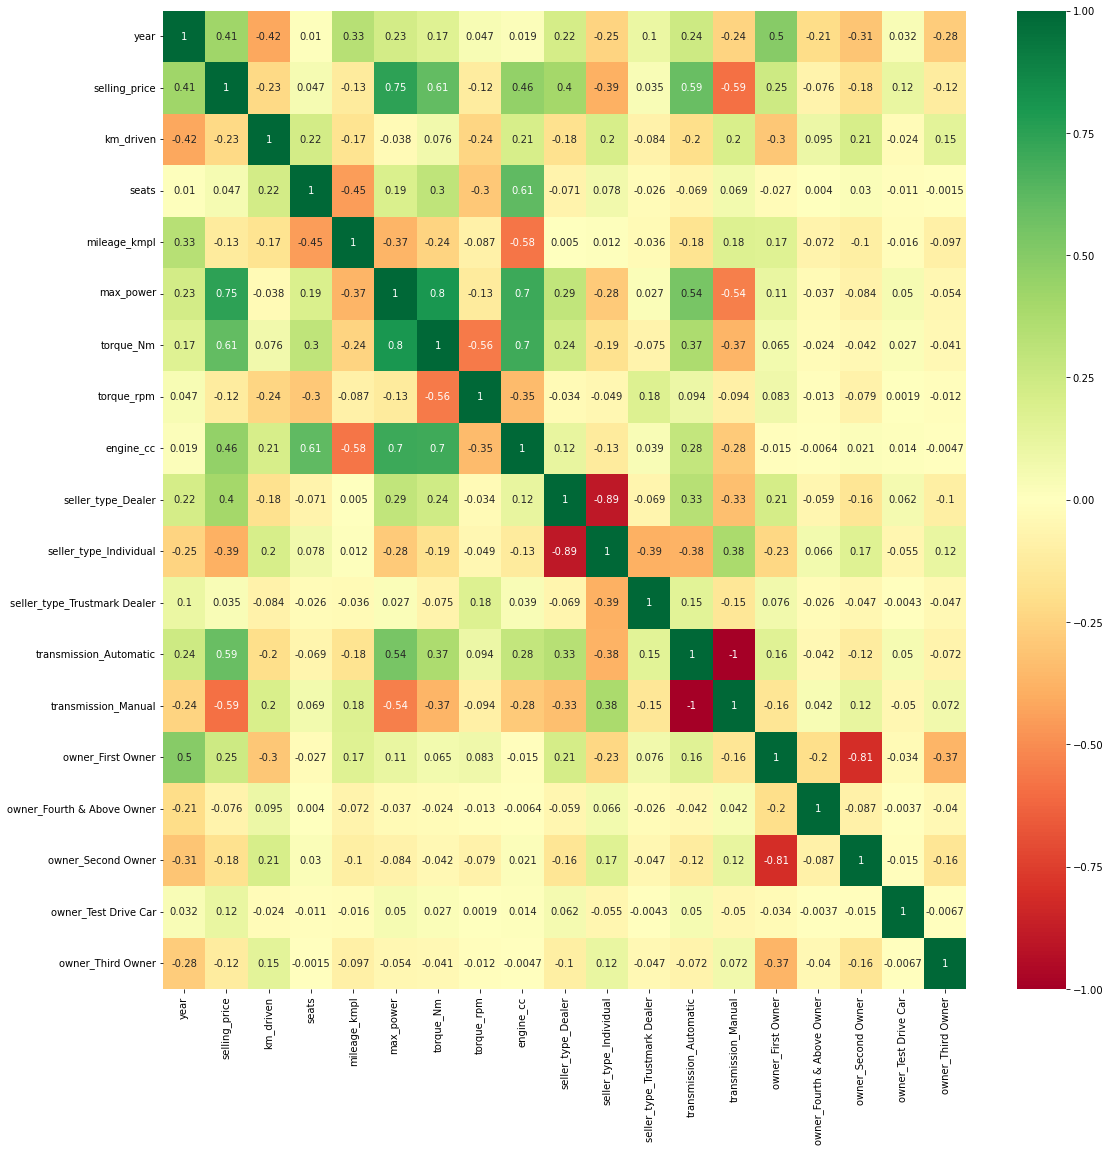

In [76]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr() , annot=True , cmap='RdYlGn')
plt.show()

In [77]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [78]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_kmpl,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,...,0,1,0,0,1,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,...,0,1,0,0,1,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,...,0,1,0,0,1,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,...,0,1,0,0,1,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,...,0,1,0,0,1,1,0,0,0,0


In [79]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [80]:
from sklearn.ensemble import RandomForestRegressor
Rfr = RandomForestRegressor()

In [81]:
df.drop(['seller_type', 'fuel', 'transmission', 'owner'], axis = 1, inplace=True)

In [82]:
df.head()

,name,year,selling_price,km_driven,seats,mileage_kmpl,max_power,torque_Nm,torque_rpm,engine_cc,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,5.0,23.40,74.00,190.00,2000.0,1248.0,0,1,0,0,1,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,5.0,21.14,103.52,250.00,2000.0,1498.0,0,1,0,0,1,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,5.0,17.70,78.00,124.46,2700.0,1497.0,0,1,0,0,1,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,5.0,23.00,90.00,219.52,2250.0,1396.0,0,1,0,0,1,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,5.0,16.10,88.20,112.70,4500.0,1298.0,0,1,0,0,1,1,0,0,0,0


In [83]:
df.describe()

,year,selling_price,km_driven,seats,mileage_kmpl,max_power,torque_Nm,torque_rpm,engine_cc,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,7907.000000,7912.000000,7906.000000,7872.000000,7907.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.405389,19.418783,91.517919,178.581993,2883.393483,1458.625016,0.138533,0.832431,0.029035,0.129183,0.870817,0.650714,0.021407,0.258981,0.000615,0.068282
std,4.044249,8.062534e+05,5.655055e+04,0.948874,4.037145,35.822499,92.054099,997.016812,503.916303,0.345480,0.373506,0.167916,0.335423,0.335423,0.476774,0.144747,0.438102,0.024796,0.252246
min,1983.000000,2.999900e+04,1.000000e+00,2.000000,0.000000,0.000000,47.040000,250.000000,624.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000,16.780000,68.050000,111.800000,2000.000000,1197.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,19.300000,82.000000,170.000000,2400.000000,1248.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000,22.320000,102.000000,209.000000,4000.000000,1582.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,42.000000,400.000000,789.000000,21800.000000,3604.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          8128 non-null   object 
 1   year                          8128 non-null   int64  
 2   selling_price                 8128 non-null   int64  
 3   km_driven                     8128 non-null   int64  
 4   seats                         8128 non-null   float64
 5   mileage_kmpl                  7907 non-null   float64
 6   max_power                     7912 non-null   float64
 7   torque_Nm                     7906 non-null   float64
 8   torque_rpm                    7872 non-null   float64
 9   engine_cc                     7907 non-null   float64
 10  seller_type_Dealer            8128 non-null   uint8  
 11  seller_type_Individual        8128 non-null   uint8  
 12  seller_type_Trustmark Dealer  8128 non-null   uint8  
 13  tra

In [85]:
names = []


In [86]:
name_stored = df['name']

In [87]:
for i in range (len(name_stored)):
    names.append(str(name_stored[i]).split(" ")[0])    
    

In [88]:
print(names)


['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Maruti', 'Hyundai', 'Maruti', 'Maruti', 'Toyota', 'Ford', 'Renault', 'Maruti', 'Maruti', 'Maruti', 'Maruti', 'Mahindra', 'Maruti', 'Hyundai', 'Maruti', 'Hyundai', 'Mahindra', 'Honda', 'Maruti', 'Maruti', 'Tata', 'Maruti', 'Maruti', 'Chevrolet', 'Maruti', 'Maruti', 'Maruti', 'Fiat', 'Maruti', 'Hyundai', 'Maruti', 'Maruti', 'Maruti', 'Hyundai', 'Datsun', 'Tata', 'Maruti', 'Jeep', 'Honda', 'Honda', 'Maruti', 'Maruti', 'Maruti', 'Toyota', 'Toyota', 'Mercedes-Benz', 'Honda', 'Mitsubishi', 'Honda', 'Maruti', 'Honda', 'Toyota', 'Toyota', 'Audi', 'Toyota', 'Audi', 'Mercedes-Benz', 'Tata', 'Hyundai', 'Hyundai', 'Maruti', 'Ford', 'Maruti', 'Volkswagen', 'Honda', 'Maruti', 'Volkswagen', 'Maruti', 'Maruti', 'Hyundai', 'Maruti', 'Toyota', 'Maruti', 'Maruti', 'Tata', 'Volkswagen', 'Toyota', 'Ford', 'BMW', 'Maruti', 'Datsun', 'Maruti', 'Maruti', 'Maruti', 'Hyundai', 'Maruti', 'Maruti', 'Volkswagen', 'Hyundai', 'Volkswagen', 'Maruti', 'Hyundai', 'Maruti', 'Hyun

In [89]:
#unique brands in the dataframe count
x = np.array(names)
print(np.unique(x))

['Ambassador' 'Ashok' 'Audi' 'BMW' 'Chevrolet' 'Daewoo' 'Datsun' 'Fiat'
 'Force' 'Ford' 'Honda' 'Hyundai' 'Isuzu' 'Jaguar' 'Jeep' 'Kia' 'Land'
 'Lexus' 'MG' 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mitsubishi' 'Nissan'
 'Opel' 'Peugeot' 'Renault' 'Skoda' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']


In [90]:
#calculating the average price of each brand so that I can use specifically while doing label encoding
#this will help my algorithm's effiency as I will replace evry car brand with numeric value
#the numeric value will be the avg value of cars from that specific brand
#to get the brand name, I have split the string at it's first space
#after assigning them with their average value, I will pass it through power transformer to reduce distortion in judgment
len(names)
Ambassador_counter = 0  
Ambassador_avg = 0 
Ashok_counter = 0 
Ashok_avg = 0 
Audi_counter = 0 
Audi_avg = 0 
BMW_counter = 0
BMW_avg = 0

In [91]:
Chevrolet_counter = 0
Chevrolet_avg = 0
Daewoo_counter = 0
Daewoo_avg = 0
Datsun_counter = 0
Datsun_avg = 0
Fiat_counter = 0
Fiat_avg = 0
Force_counter = 0
Force_avg = 0
Ford_counter = 0
Ford_avg = 0
Honda_counter = 0
Honda_avg = 0
Hyundai_counter = 0
Hyundai_avg = 0
Isuzu_counter = 0
Isuzu_avg = 0
Jaguar_counter = 0
Jaguar_avg = 0
Jeep_counter = 0
Jeep_avg = 0
Kia_counter = 0
Kia_avg = 0
Land_counter = 0
Land_avg = 0
Lexus_counter = 0
Lexus_avg = 0
MG_counter = 0
MG_avg = 0
Mahindra_counter = 0
Mahindra_avg = 0
Maruti_counter = 0
Maruti_avg = 0
MercedesBenz_counter = 0
MercedesBenz_avg = 0
Mitsubishi_counter = 0
Mitsubishi_avg = 0
Nissan_counter = 0
Nissan_avg = 0
Opel_counter = 0
Opel_avg = 0
Peugeot_counter = 0
Peugeot_avg = 0
Renault_counter = 0
Renault_avg = 0 
Skoda_counter = 0
Skoda_avg = 0
Tata_counter= 0
Tata_avg = 0
Toyota_counter = 0
Toyota_avg = 0
Volkswagen_counter = 0
Volkswagen_avg = 0 
Volvo_counter = 0
Volvo_avg = 0


In [92]:
x = np.array(names)
print(np.unique(x))

['Ambassador' 'Ashok' 'Audi' 'BMW' 'Chevrolet' 'Daewoo' 'Datsun' 'Fiat'
 'Force' 'Ford' 'Honda' 'Hyundai' 'Isuzu' 'Jaguar' 'Jeep' 'Kia' 'Land'
 'Lexus' 'MG' 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mitsubishi' 'Nissan'
 'Opel' 'Peugeot' 'Renault' 'Skoda' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']


In [93]:
for i in range(len(names)):
    if (str(names[i])==('Ambassador')):
        Ambassador_counter+=1
        Ambassador_avg += df['selling_price'][i]
    elif (str(names[i])==('Ashok')):
        Ashok_counter+=1
        Ashok_avg += df['selling_price'][i]
    elif (str(names[i])==('Audi')):
        Audi_counter+=1
        Audi_avg += df['selling_price'][i]
    elif (str(names[i])==('BMW')):
        BMW_counter+=1
        BMW_avg += df['selling_price'][i]
    elif (str(names[i])==('Chevrolet')):
        Chevrolet_counter+=1
        Chevrolet_avg += df['selling_price'][i]
    elif (str(names[i])==('Daewoo')):
        Daewoo_counter+=1
        Daewoo_avg += df['selling_price'][i]
    elif (str(names[i])==('Datsun')):
        Datsun_counter+=1
        Datsun_avg += df['selling_price'][i]
    elif (str(names[i])==('Fiat')):
        Fiat_counter+=1
        Fiat_avg += df['selling_price'][i]
    elif (str(names[i])==('Force')):
        Force_counter+=1
        Force_avg += df['selling_price'][i]
    elif (str(names[i])==('Ford')):
        Ford_counter+=1
        Ford_avg += df['selling_price'][i]
    elif (str(names[i])==('Honda')):
        Honda_counter+=1
        Honda_avg += df['selling_price'][i]
    elif (str(names[i])==('Hyundai')):
        Hyundai_counter+=1
        Hyundai_avg += df['selling_price'][i]
    elif (str(names[i])==('Isuzu')):
        Isuzu_counter+=1
        Isuzu_avg += df['selling_price'][i]
    elif (str(names[i])==('Jaguar')):
        Jaguar_counter+=1
        Jaguar_avg += df['selling_price'][i]
    elif (str(names[i])==('Jeep')):
        Jeep_counter+=1
        Jeep_avg += df['selling_price'][i]
    elif (str(names[i])==('Kia')):
        Kia_counter+=1
        Kia_avg += df['selling_price'][i] 
    elif (str(names[i])==('Land')):
        Land_counter+=1
        Land_avg += df['selling_price'][i]
    elif (str(names[i])==('Lexus')):
        Lexus_counter+=1
        Lexus_avg += df['selling_price'][i]
    elif (str(names[i])==('MG')):
        MG_counter+=1
        MG_avg += df['selling_price'][i]
    elif (str(names[i])==('Mahindra')):
        Mahindra_counter+=1
        Mahindra_avg += df['selling_price'][i]
    elif (str(names[i])==('Maruti')):
        Maruti_counter+=1
        Maruti_avg += df['selling_price'][i]
    elif (str(names[i])==('Mercedes-Benz')):
        MercedesBenz_counter+=1
        MercedesBenz_avg += df['selling_price'][i]
    elif (str(names[i])==('Mitsubishi')):
        Mitsubishi_counter+=1
        Mitsubishi_avg += df['selling_price'][i]
    elif (str(names[i])==('Nissan')):
        Nissan_counter+=1
        Nissan_avg += df['selling_price'][i]     
    elif (str(names[i])==('Opel')):
        Opel_counter+=1
        Opel_avg += df['selling_price'][i]
    elif (str(names[i])==('Peugeot')):
        Peugeot_counter+=1
        Peugeot_avg += df['selling_price'][i]
    elif (str(names[i])==('Renault')):
        Renault_counter+=1
        Renault_avg += df['selling_price'][i]
    elif (str(names[i])==('Skoda')):
        Skoda_counter+=1
        Skoda_avg += df['selling_price'][i]
    elif (str(names[i])==('Tata')):
        Tata_counter+=1
        Tata_avg += df['selling_price'][i]
    elif (str(names[i])==('Toyota')):
        Toyota_counter+=1
        Toyota_avg += df['selling_price'][i]
    elif (str(names[i])==('Volkswagen')):
        Volkswagen_counter+=1
        Volkswagen_avg += df['selling_price'][i]
    elif (str(names[i])==('Volvo')):
        Volvo_counter+=1
        Volvo_avg += df['selling_price'][i]
    
print(Ambassador_avg) 


496000


In [94]:
x = np.array(names)
print(np.unique(x))

['Ambassador' 'Ashok' 'Audi' 'BMW' 'Chevrolet' 'Daewoo' 'Datsun' 'Fiat'
 'Force' 'Ford' 'Honda' 'Hyundai' 'Isuzu' 'Jaguar' 'Jeep' 'Kia' 'Land'
 'Lexus' 'MG' 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mitsubishi' 'Nissan'
 'Opel' 'Peugeot' 'Renault' 'Skoda' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']


In [95]:
print(Ambassador_avg/Ambassador_counter)
print(Ashok_avg/Ashok_counter)
print(Audi_avg/Audi_counter)
print(BMW_avg/BMW_counter)
print(Chevrolet_avg/Chevrolet_counter)
print(Daewoo_avg/Daewoo_counter)
print(Datsun_avg/Datsun_counter)
print(Fiat_avg/Fiat_counter)
print(Force_avg/Force_counter)
print(Ford_avg/Ford_counter)
print(Honda_avg/Honda_counter)
print(Hyundai_avg/Hyundai_counter)
print(Isuzu_avg/Isuzu_counter)
print(Jaguar_avg/Jaguar_counter)
print(Jeep_avg/Jeep_counter)
print(Kia_avg/Kia_counter)
print(Land_avg/Land_counter)
print(Lexus_avg/Lexus_counter)
print(MG_avg/MG_counter)
print(Mahindra_avg/Mahindra_counter)
print(Maruti_avg/Maruti_counter)
print(MercedesBenz_avg/MercedesBenz_counter)
print(Mitsubishi_avg/Mitsubishi_counter)
print(Nissan_avg/Nissan_counter)
print(Opel_avg/Opel_counter)
print(Peugeot_avg/Peugeot_counter)
print(Renault_avg/Renault_counter)
print(Skoda_avg/Skoda_counter)
print(Tata_avg/Tata_counter)
print(Toyota_avg/Toyota_counter)
print(Volkswagen_avg/Volkswagen_counter)
print(Volvo_avg/Volvo_counter)

124000.0
300000.0
2612199.925
4109916.6666666665
273867.47826086957
77000.0
314599.95384615386
296063.78723404254
887500.0
516682.58186397987
596178.0149892934
458554.3667844523
1942000.0
2915464.7887323946
2149612.870967742
1504500.0
3608333.3333333335
5150000.0
1783333.3333333333
623224.0556994819
403075.7214052288
2470444.4444444445
817500.0
465407.35802469135
68000.0
57000.0
462618.38157894736
607723.7714285714
357433.1076294278
959946.6741803279
498817.188172043
3272014.925373134


In [96]:
avgs_list = [124000.0, 3272014.925373134, 498817.188172043, 959946.6741803279, 357433.1076294278, 607723.7714285714, 462618.38157894736, 57000.0, 68000.0, 465407.35802469135, 817500.0, 2470444.4444444445, 403075.7214052288, 623224.0556994819, 1783333.3333333333, 5150000.0, 3608333.3333333335, 1504500.0, 2149612.870967742, 2915464.7887323946, 1942000.0, 458554.3667844523, 596178.0149892934, 516682.58186397987, 887500.0, 296063.78723404254, 314599.95384615386, 77000.0, 273867.47826086957, 4109916.6666666665, 2612199.925, 300000.0] 

In [97]:
avgs_list.sort()
print(avgs_list)

[57000.0, 68000.0, 77000.0, 124000.0, 273867.47826086957, 296063.78723404254, 300000.0, 314599.95384615386, 357433.1076294278, 403075.7214052288, 458554.3667844523, 462618.38157894736, 465407.35802469135, 498817.188172043, 516682.58186397987, 596178.0149892934, 607723.7714285714, 623224.0556994819, 817500.0, 887500.0, 959946.6741803279, 1504500.0, 1783333.3333333333, 1942000.0, 2149612.870967742, 2470444.4444444445, 2612199.925, 2915464.7887323946, 3272014.925373134, 3608333.3333333335, 4109916.6666666665, 5150000.0]


In [98]:
dataset = df

In [99]:
 for i in range(len(names)):
    if (str(names[i])==('Ambassador')):
        dataset['name'][i] = Ambassador_avg/Ambassador_counter
    elif (str(names[i])==('Ashok')):
        dataset['name'][i] = Ashok_avg/Ashok_counter
    elif (str(names[i])==('Audi')):
        dataset['name'][i] = Audi_avg/Audi_counter
    elif (str(names[i])==('BMW')):
        dataset['name'][i] = BMW_avg/BMW_counter
    elif (str(names[i])==('Chevrolet')):
        dataset['name'][i] = Chevrolet_avg/Chevrolet_counter
    elif (str(names[i])==('Daewoo')):
        dataset['name'][i] = Daewoo_avg/Daewoo_counter
    elif (str(names[i])==('Datsun')):
        dataset['name'][i] = Datsun_avg/Datsun_counter     
    elif (str(names[i])==('Fiat')):
        dataset['name'][i] = Fiat_avg/Fiat_counter
    elif (str(names[i])==('Force')):
        dataset['name'][i] = Force_avg/Force_counter
    elif (str(names[i])==('Ford')):
        dataset['name'][i] = Ford_avg/Ford_counter
    elif (str(names[i])==('Honda')):
        dataset['name'][i] = Honda_avg/Honda_counter
    elif (str(names[i])==('Hyundai')):
        dataset['name'][i] = Hyundai_avg/Hyundai_counter
    elif (str(names[i])==('Isuzu')):
        dataset['name'][i] = Isuzu_avg/Isuzu_counter
    elif (str(names[i])==('Jaguar')):
        dataset['name'][i] = Jaguar_avg/Jaguar_counter
    elif (str(names[i])==('Jeep')):
        dataset['name'][i] = Jeep_avg/Jeep_counter
    elif (str(names[i])==('Kia')):
        dataset['name'][i] = Kia_avg/Kia_counter
    elif (str(names[i])==('Land')):
        dataset['name'][i] = Land_avg/Land_counter
    elif (str(names[i])==('Lexus')):
        dataset['name'][i] = Lexus_avg/Lexus_counter
    elif (str(names[i])==('MG')):
        dataset['name'][i] = MG_avg/MG_counter
    elif (str(names[i])==('Mahindra')):
        dataset['name'][i] = Mahindra_avg/Mahindra_counter
    elif (str(names[i])==('Maruti')):
        dataset['name'][i] = Maruti_avg/Maruti_counter
    elif (str(names[i])==('Mercedes-Benz')):
        dataset['name'][i] = MercedesBenz_avg/MercedesBenz_counter
    elif (str(names[i])==('Mitsubishi')):
        dataset['name'][i] = Mitsubishi_avg/Mitsubishi_counter
    elif (str(names[i])==('Nissan')):
        dataset['name'][i] = Nissan_avg/Nissan_counter     
    elif (str(names[i])==('Opel')):
        dataset['name'][i] = Opel_avg/Opel_counter
    elif (str(names[i])==('Peugeot')):
        dataset['name'][i] = Peugeot_avg/Peugeot_counter
    elif (str(names[i])==('Renault')):
        dataset['name'][i] = Renault_avg/Renault_counter
    elif (str(names[i])==('Skoda')):
        dataset['name'][i] = Skoda_avg/Skoda_counter
    elif (str(names[i])==('Tata')):
        dataset['name'][i] = Tata_avg/Tata_counter
    elif (str(names[i])==('Toyota')):
        dataset['name'][i] = Toyota_avg/Toyota_counter
    elif (str(names[i])==('Volkswagen')):
        dataset['name'][i] = Volkswagen_avg/Volkswagen_counter
    elif (str(names[i])==('Volvo')):
        dataset['name'][i] = Volvo_avg/Volvo_counter
    
     

In [100]:
dataset.head()

,name,year,selling_price,km_driven,seats,mileage_kmpl,max_power,torque_Nm,torque_rpm,engine_cc,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,403075.721405,2014,450000,145500,5.0,23.40,74.00,190.00,2000.0,1248.0,0,1,0,0,1,1,0,0,0,0
1,607723.771429,2014,370000,120000,5.0,21.14,103.52,250.00,2000.0,1498.0,0,1,0,0,1,0,0,1,0,0
2,596178.014989,2006,158000,140000,5.0,17.70,78.00,124.46,2700.0,1497.0,0,1,0,0,1,0,0,0,0,1
3,458554.366784,2010,225000,127000,5.0,23.00,90.00,219.52,2250.0,1396.0,0,1,0,0,1,1,0,0,0,0
4,403075.721405,2007,130000,120000,5.0,16.10,88.20,112.70,4500.0,1298.0,0,1,0,0,1,1,0,0,0,0


In [101]:
#from sklearn.preprocessing import RobustScaler
#scaler = RobustScaler()
#features = dataset[['name']]
#dataset['name'] = scaler.fit_transform(features.values)

#from sklearn.preprocessing import QuantileTransformer
#scaler = QuantileTransformer()
#features = dataset[['name']]
#dataset['name'] = scaler.fit_transform(features.values)
#dataset.head()

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'box-cox')
features = dataset[['name']]
dataset['name'] = scaler.fit_transform(features.values)
dataset.head()

,name,year,selling_price,km_driven,seats,mileage_kmpl,max_power,torque_Nm,torque_rpm,engine_cc,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,-0.505951,2014,450000,145500,5.0,23.40,74.00,190.00,2000.0,1248.0,0,1,0,0,1,1,0,0,0,0
1,0.609086,2014,370000,120000,5.0,21.14,103.52,250.00,2000.0,1498.0,0,1,0,0,1,0,0,1,0,0
2,0.565305,2006,158000,140000,5.0,17.70,78.00,124.46,2700.0,1497.0,0,1,0,0,1,0,0,0,0,1
3,-0.112446,2010,225000,127000,5.0,23.00,90.00,219.52,2250.0,1396.0,0,1,0,0,1,1,0,0,0,0
4,-0.505951,2007,130000,120000,5.0,16.10,88.20,112.70,4500.0,1298.0,0,1,0,0,1,1,0,0,0,0


In [102]:
df.head(40)

,name,year,selling_price,km_driven,seats,mileage_kmpl,max_power,torque_Nm,torque_rpm,engine_cc,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,-0.505951,2014,450000,145500,5.0,23.40,74.00,190.00,2000.0,1248.0,0,1,0,0,1,1,0,0,0,0
1,0.609086,2014,370000,120000,5.0,21.14,103.52,250.00,2000.0,1498.0,0,1,0,0,1,0,0,1,0,0
2,0.565305,2006,158000,140000,5.0,17.70,78.00,124.46,2700.0,1497.0,0,1,0,0,1,0,0,0,0,1
3,-0.112446,2010,225000,127000,5.0,23.00,90.00,219.52,2250.0,1396.0,0,1,0,0,1,1,0,0,0,0
4,-0.505951,2007,130000,120000,5.0,16.10,88.20,112.70,4500.0,1298.0,0,1,0,0,1,1,0,0,0,0
5,-0.112446,2017,440000,45000,5.0,20.14,81.86,113.75,4000.0,1197.0,0,1,0,0,1,1,0,0,0,0
6,-0.505951,2007,96000,175000,5.0,17.30,57.50,76.44,4500.0,1061.0,0,1,0,0,1,1,0,0,0,0
7,-0.505951,2001,45000,5000,4.0,16.10,37.00,59.00,2500.0,796.0,0,1,0,0,1,0,0,1,0,0
8,1.464504,2011,350000,90000,5.0,23.59,67.10,170.00,2100.0,1364.0,0,1,0,0,1,1,0,0,0,0
9,0.214791,2013,200000,169000,5.0,20.00,68.10,160.00,2000.0,1399.0,0,1,0,0,1,1,0,0,0,0


In [103]:


dataset['mileage_kmpl'][644] = 13.0
dataset['mileage_kmpl'][785] = 13.0
dataset['mileage_kmpl'][1649] = 13.0
dataset['mileage_kmpl'][1676] = 8.9
dataset['mileage_kmpl'][2137] = 12.8
dataset['mileage_kmpl'][2366] = 13.8
dataset['mileage_kmpl'][2725] = 13.8
dataset['mileage_kmpl'][4527] = 8.9
dataset['mileage_kmpl'][5276] = 13.0
dataset['mileage_kmpl'][5843] = 17.2
dataset['mileage_kmpl'][5846] = 17.2
dataset['mileage_kmpl'][5900] = 13.0
dataset['mileage_kmpl'][6534] = 13.0
dataset['mileage_kmpl'][6629] = 13.0
dataset['mileage_kmpl'][6824] = 13.0
dataset['mileage_kmpl'][7002] = 13.8
dataset['mileage_kmpl'][7337] = 8.9
dataset['max_power'][575] = 66
dataset['max_power'][576] = 66
dataset['max_power'][1442] = 74
dataset['max_power'][1443] = 74
dataset['max_power'][2549] = 74
dataset['max_power'][2550] = 74


imp = IterativeImputer(estimator=Rfr, verbose=2, max_iter= 10, tol = 1e-30, imputation_order='ascending')
imputed = imp.fit_transform(dataset)
dataset_imputed = pd.DataFrame(imputed, columns=dataset.columns)


[IterativeImputer] Completing matrix with shape (8128, 20)
[IterativeImputer] Ending imputation round 1/10, elapsed time 32.70
[IterativeImputer] Change: 1856.1537583040556, scaled tolerance: 1.0000000000000001e-23 
[IterativeImputer] Ending imputation round 2/10, elapsed time 65.68
[IterativeImputer] Change: 1348.1943, scaled tolerance: 1.0000000000000001e-23 
[IterativeImputer] Ending imputation round 3/10, elapsed time 98.41
[IterativeImputer] Change: 8182.206800000001, scaled tolerance: 1.0000000000000001e-23 
[IterativeImputer] Ending imputation round 4/10, elapsed time 131.04
[IterativeImputer] Change: 7659.635900000001, scaled tolerance: 1.0000000000000001e-23 
[IterativeImputer] Ending imputation round 5/10, elapsed time 163.60
[IterativeImputer] Change: 1562.9854, scaled tolerance: 1.0000000000000001e-23 
[IterativeImputer] Ending imputation round 6/10, elapsed time 196.70
[IterativeImputer] Change: 1566.8802000000003, scaled tolerance: 1.0000000000000001e-23 
[IterativeImpute

/Users/lumiousk/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [104]:
dataset_imputed.head(40)

,name,year,selling_price,km_driven,seats,mileage_kmpl,max_power,torque_Nm,torque_rpm,engine_cc,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,-0.505951,2014.0,450000.0,145500.0,5.0,23.4000,74.000,190.0000,2000.0,1248.00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.609086,2014.0,370000.0,120000.0,5.0,21.1400,103.520,250.0000,2000.0,1498.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.565305,2006.0,158000.0,140000.0,5.0,17.7000,78.000,124.4600,2700.0,1497.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.112446,2010.0,225000.0,127000.0,5.0,23.0000,90.000,219.5200,2250.0,1396.00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,-0.505951,2007.0,130000.0,120000.0,5.0,16.1000,88.200,112.7000,4500.0,1298.00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5,-0.112446,2017.0,440000.0,45000.0,5.0,20.1400,81.860,113.7500,4000.0,1197.00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6,-0.505951,2007.0,96000.0,175000.0,5.0,17.3000,57.500,76.4400,4500.0,1061.00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,-0.505951,2001.0,45000.0,5000.0,4.0,16.1000,37.000,59.0000,2500.0,796.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,1.464504,2011.0,350000.0,90000.0,5.0,23.5900,67.100,170.0000,2100.0,1364.00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,0.214791,2013.0,200000.0,169000.0,5.0,20.0000,68.100,160.0000,2000.0,1399.00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [105]:
dataset.head(1)

,name,year,selling_price,km_driven,seats,mileage_kmpl,max_power,torque_Nm,torque_rpm,engine_cc,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,-0.505951,2014,450000,145500,5.0,23.4,74.0,190.0,2000.0,1248.0,0,1,0,0,1,1,0,0,0,0


In [127]:
dataset_imputed.head(139)

,name,year,selling_price,km_driven,seats,mileage_kmpl,max_power,torque_Nm,torque_rpm,engine_cc,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,-0.505951,2014.0,450000.0,145500.0,5.0,23.4000,74.0000,190.0000,2000.000,1248.00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.609086,2014.0,370000.0,120000.0,5.0,21.1400,103.5200,250.0000,2000.000,1498.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.565305,2006.0,158000.0,140000.0,5.0,17.7000,78.0000,124.4600,2700.000,1497.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.112446,2010.0,225000.0,127000.0,5.0,23.0000,90.0000,219.5200,2250.000,1396.00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,-0.505951,2007.0,130000.0,120000.0,5.0,16.1000,88.2000,112.7000,4500.000,1298.00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5,-0.112446,2017.0,440000.0,45000.0,5.0,20.1400,81.8600,113.7500,4000.000,1197.00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6,-0.505951,2007.0,96000.0,175000.0,5.0,17.3000,57.5000,76.4400,4500.000,1061.00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,-0.505951,2001.0,45000.0,5000.0,4.0,16.1000,37.0000,59.0000,2500.000,796.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,1.464504,2011.0,350000.0,90000.0,5.0,23.5900,67.1000,170.0000,2100.000,1364.00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,0.214791,2013.0,200000.0,169000.0,5.0,20.0000,68.1000,160.0000,2000.000,1399.00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


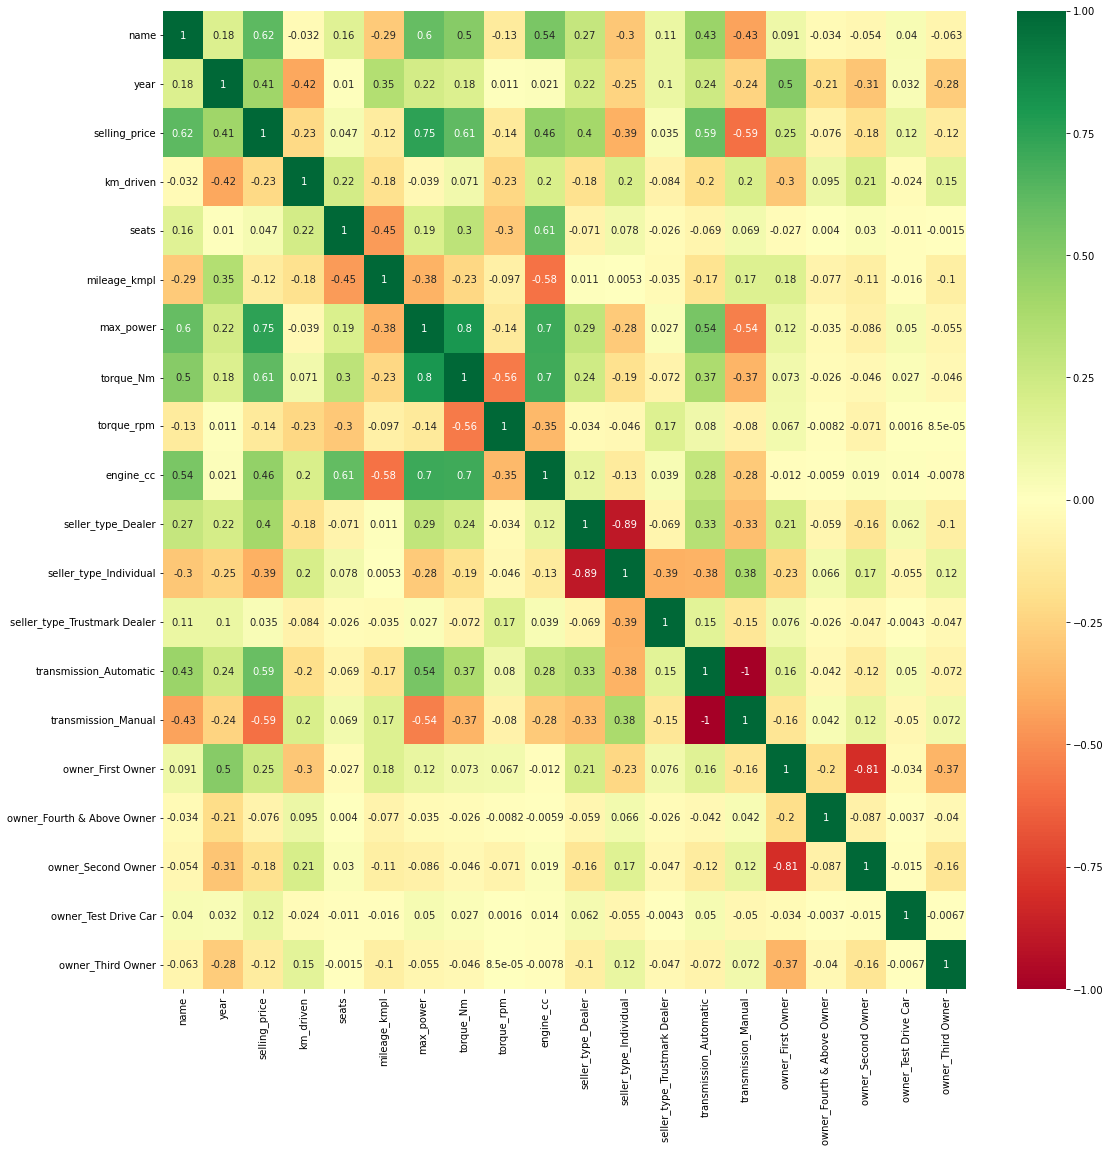

In [107]:

plt.figure(figsize=(18,18))
sns.heatmap(dataset_imputed.corr() , annot=True , cmap='RdYlGn')
plt.show()

In [108]:
dataset_imputed.head()

,name,year,selling_price,km_driven,seats,mileage_kmpl,max_power,torque_Nm,torque_rpm,engine_cc,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,-0.505951,2014.0,450000.0,145500.0,5.0,23.40,74.00,190.00,2000.0,1248.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.609086,2014.0,370000.0,120000.0,5.0,21.14,103.52,250.00,2000.0,1498.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.565305,2006.0,158000.0,140000.0,5.0,17.70,78.00,124.46,2700.0,1497.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.112446,2010.0,225000.0,127000.0,5.0,23.00,90.00,219.52,2250.0,1396.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,-0.505951,2007.0,130000.0,120000.0,5.0,16.10,88.20,112.70,4500.0,1298.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [109]:
dataset_scaled = dataset_imputed.copy()
col_names = [ 'mileage_kmpl', 'year', 'km_driven' ,'seats','max_power','torque_Nm', 'torque_rpm','engine_cc']
#col_names = [ 'max_power']
features = dataset_scaled[col_names]
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'box-cox')
dataset_scaled[col_names] = scaler.fit_transform(features.values)
dataset_scaled.head()

/Users/lumiousk/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:912: RuntimeWarning: overflow encountered in power
  variance = np.var(data**lmb / lmb, axis=0)
/Users/lumiousk/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/lumiousk/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


,name,year,selling_price,km_driven,seats,mileage_kmpl,max_power,torque_Nm,torque_rpm,engine_cc,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,-0.505951,0.004020,450000.0,1.404773,-0.372395,1.020486,-0.385921,0.406774,-0.920484,-0.260570,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.609086,0.004020,370000.0,1.064534,-0.372395,0.466532,0.585912,0.952143,-0.920484,0.330145,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.565305,-1.889920,158000.0,1.334788,-0.372395,-0.405156,-0.226664,-0.461056,-0.071894,0.328080,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.112446,-0.986149,225000.0,1.162153,-0.372395,0.923414,0.193166,0.695467,-0.593750,0.108258,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,-0.505951,-1.671662,130000.0,1.064534,-0.372395,-0.824278,0.135033,-0.669556,1.500435,-0.128970,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [110]:
dataset_scaled.head()
dataset_scaled.isnull().sum()

name                            0
year                            0
selling_price                   0
km_driven                       0
seats                           0
mileage_kmpl                    0
max_power                       0
torque_Nm                       0
torque_rpm                      0
engine_cc                       0
seller_type_Dealer              0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Automatic          0
transmission_Manual             0
owner_First Owner               0
owner_Fourth & Above Owner      0
owner_Second Owner              0
owner_Test Drive Car            0
owner_Third Owner               0
dtype: int64

In [111]:
X = dataset_scaled.drop('selling_price', axis=1) 
y = dataset_scaled['selling_price']

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [113]:
from sklearn.ensemble import ExtraTreesRegressor 
rf = ExtraTreesRegressor()
rf.fit(X_train, y_train)

ExtraTreesRegressor()

In [114]:
rf.score(X_test , y_test)

0.9740014761447435

In [115]:
y_pred = rf.predict(X_train)

In [116]:
rf.score(X_train , y_train) *100

99.96491731757726

/Users/lumiousk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

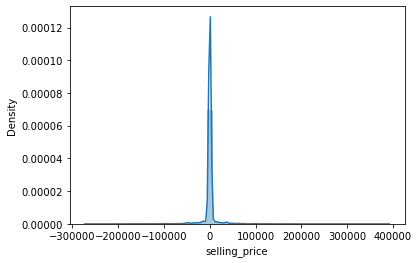

In [117]:
sns.distplot( y_train - y_pred)

# Hyperparameter Tuning

In [118]:

from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [119]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [120]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [121]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [122]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [123]:
rf_new = ExtraTreesRegressor(n_estimators = 700, min_samples_split= 15, min_samples_leaf = 1, max_features = 'auto', max_depth = 20)

In [124]:
rf_new.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [125]:
rf_new.score(X_test, y_test)

0.9721280090153986